In [1]:
import Bio.PDB
import numpy
import matplotlib.pyplot as plt

pdb_code = ["2imn", "2imn"]
pdb_filename = ["input/2imn.pdb","input/2imn.pdb"]

## Visualise attention weights from this dataset

In [8]:
from transformers import (
    RobertaConfig,
    RobertaTokenizer,
    RobertaForMaskedLM,
    DataCollatorForLanguageModeling,
    TrainingArguments,
    Trainer,
)
from datasets import load_dataset
import os
import torch
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pickle

# Initialise the tokeniser
tokenizer = RobertaTokenizer.from_pretrained("antibody-tokenizer")
model = RobertaForMaskedLM.from_pretrained("./model-4-6-1")
seq = "DIVMTQSPSSLSVSAGERVTMSCKSSQSLLYKDGKNFLAWYQQKPGQPPKLLIYGASTRESGVPDRFTGSGSGTDFTLTISSVQAEDLAVYYCQNDHSYPLTFGAGTKLELKR"

In [9]:
# only plot self-attention weights among CDRs using IMGT conventions
filter_ind = np.concatenate((np.arange(25,39),np.arange(54,66),np.arange(103,118)))
def filter(mat, filter_ind=None):
    if isinstance(filter_ind, np.ndarray):
        mat_new = mat[filter_ind,:]
        mat_new = mat_new[:,filter_ind]
        return mat_new
    else:
        return mat

In [10]:
def visualise_self_att(seq, seq_name, model=model, filter_ind=filter_ind, head=1):
    token_ids = tokenizer.encode(seq, return_tensors='pt')
    out = model(token_ids)
    mat = out.attentions[1].detach().numpy()

    # create the heatmap
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.matshow(filter(mat[0][head], filter_ind), cmap='Purples',vmin=0,vmax=0.1)
    
    if isinstance(filter_ind, np.ndarray):
    # set axis labels
        m = len(filter_ind)
        ax.set_xticklabels(filter_ind)
        ax.set_yticklabels(filter_ind)
    else:
        m = len(token_ids)
    ax.set_xticks(np.arange(m))
    ax.set_yticks(np.arange(m))
    ax.set_title(f'Self-attention of {seq_name}')
    ax.tick_params(axis='both', which='major', labelsize=8)
    plt.xticks(rotation=90)
    fig.colorbar(cax)
    plt.show()

In [11]:
def load_FASTA(filename):
    count = 0
    current_seq = ''
    all_seqs = []
    with open(filename,'r') as f:
        for line in f:
            if line[0] == '>':
                all_seqs.append(current_seq)
                current_seq = ''
            else:
                current_seq+=line[:-1]
                count+=1
        all_seqs.append(current_seq)
        #all_seqs=np.array(map(lambda x: [aadict[y] for y in x],all_seqs[1:]),dtype=int,order="c")
    return all_seqs

name_fasta='input/sabdab_heavy.txt'
seqs_al  =load_FASTA(name_fasta)[1:]

# remove gaps in seqs_al
seqs=[]
for s in range(len(seqs_al)):
    seqs.append(''.join([seqs_al[s][i] for i in range(len(seqs_al[s])) if seqs_al[s][i]!='-']))

In [12]:
# 1, 0, 1 makes sense, 0,0,-1 does not

C:\Users\XTM23\AppData\Local\Temp\ipykernel_9976\3852549790.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(filter_ind)
C:\Users\XTM23\AppData\Local\Temp\ipykernel_9976\3852549790.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(filter_ind)


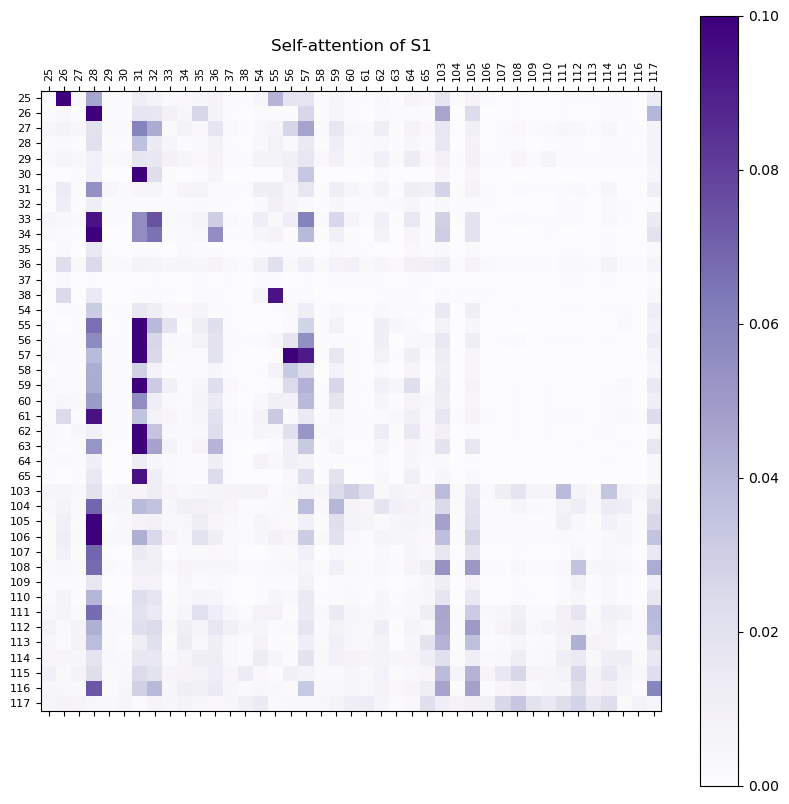

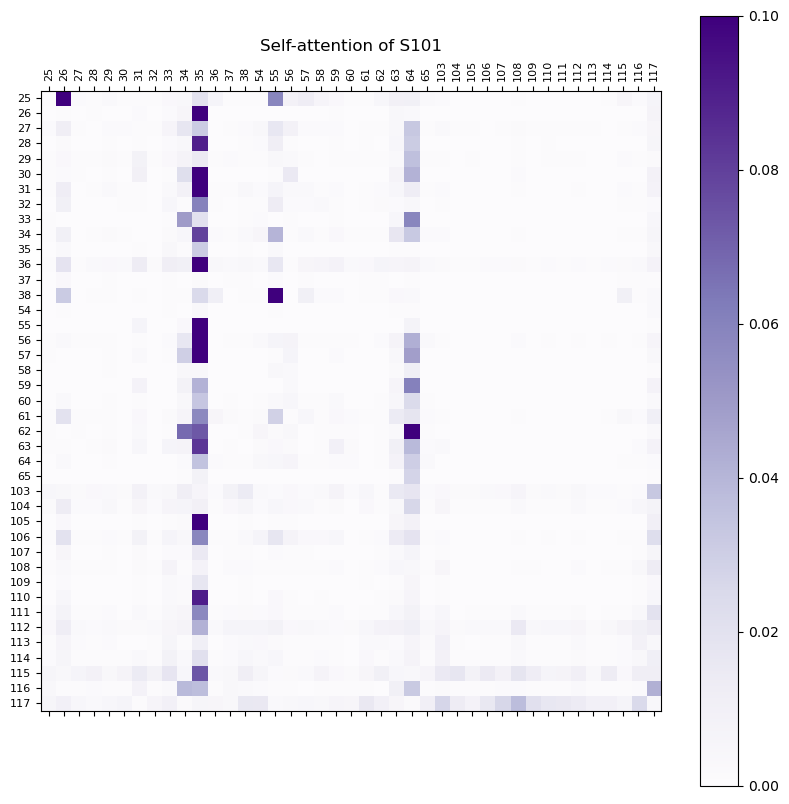

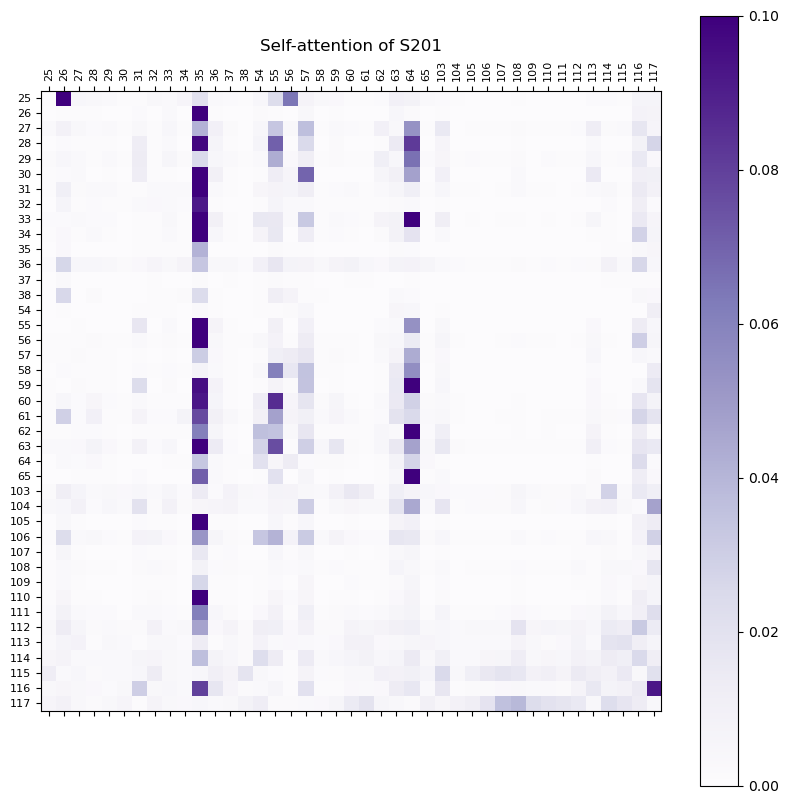

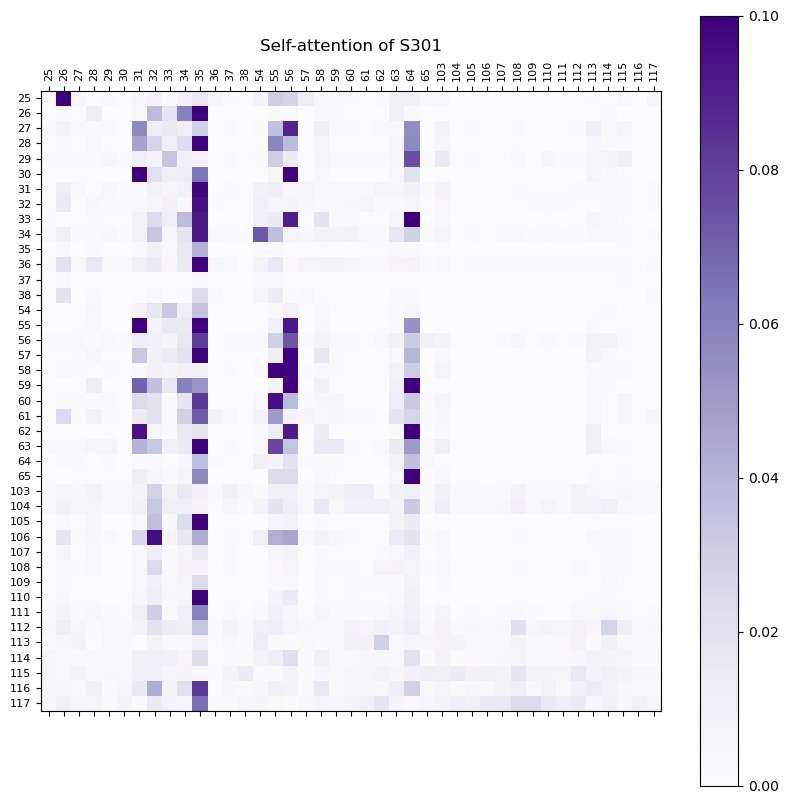

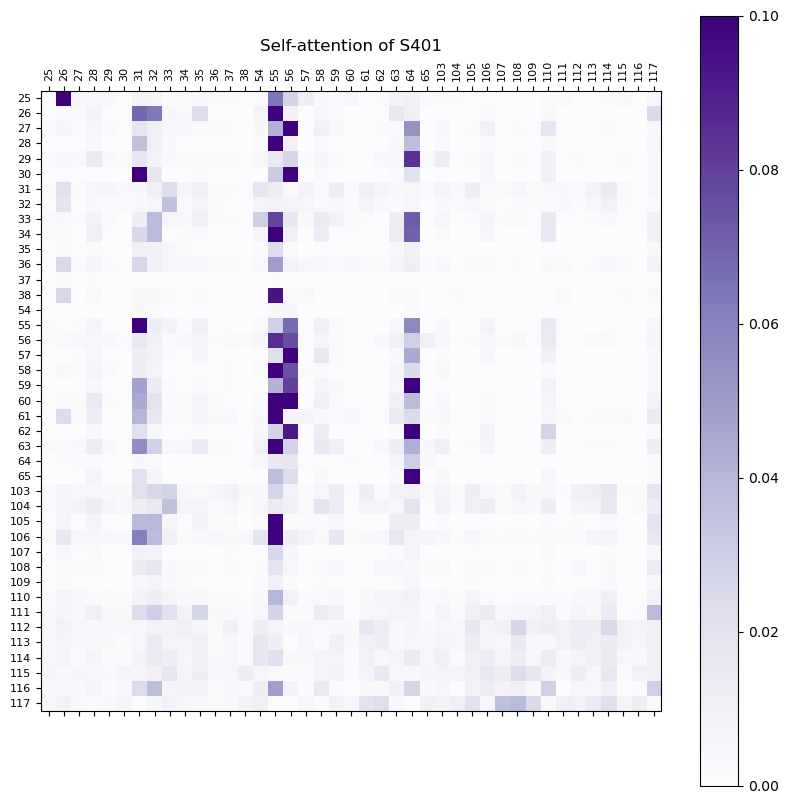

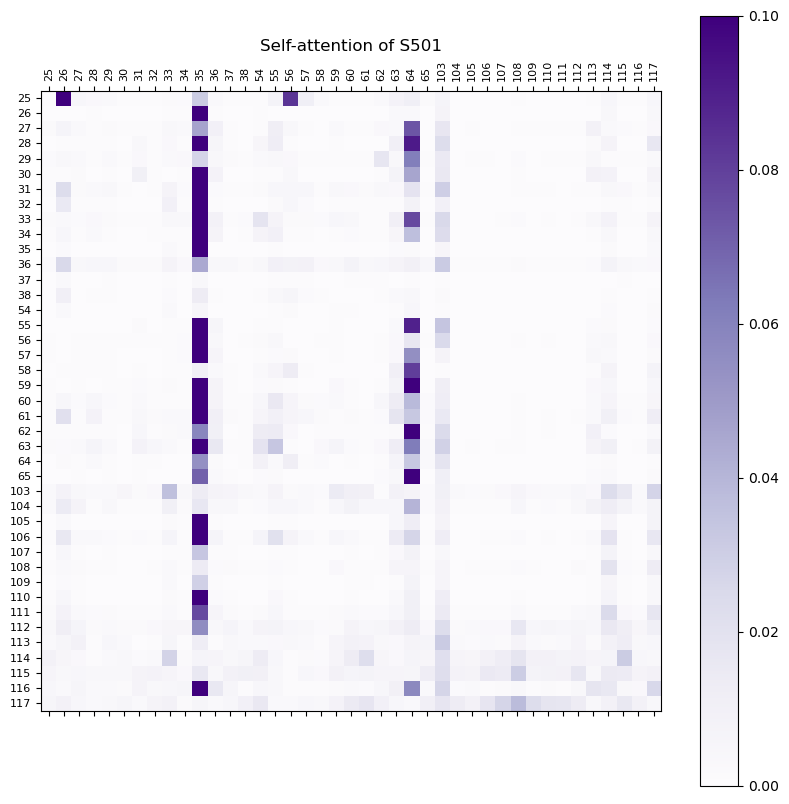

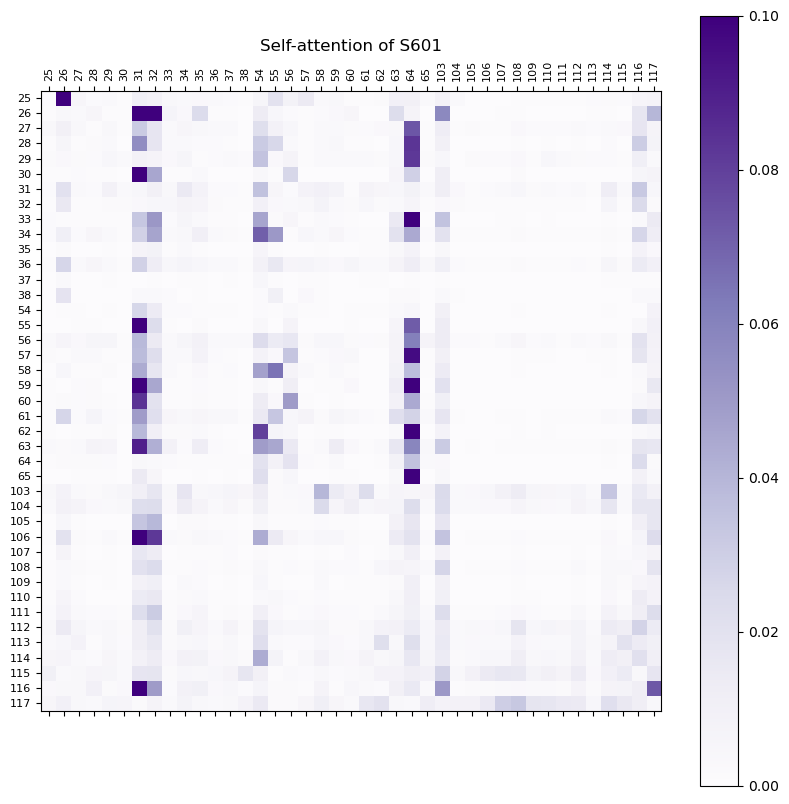

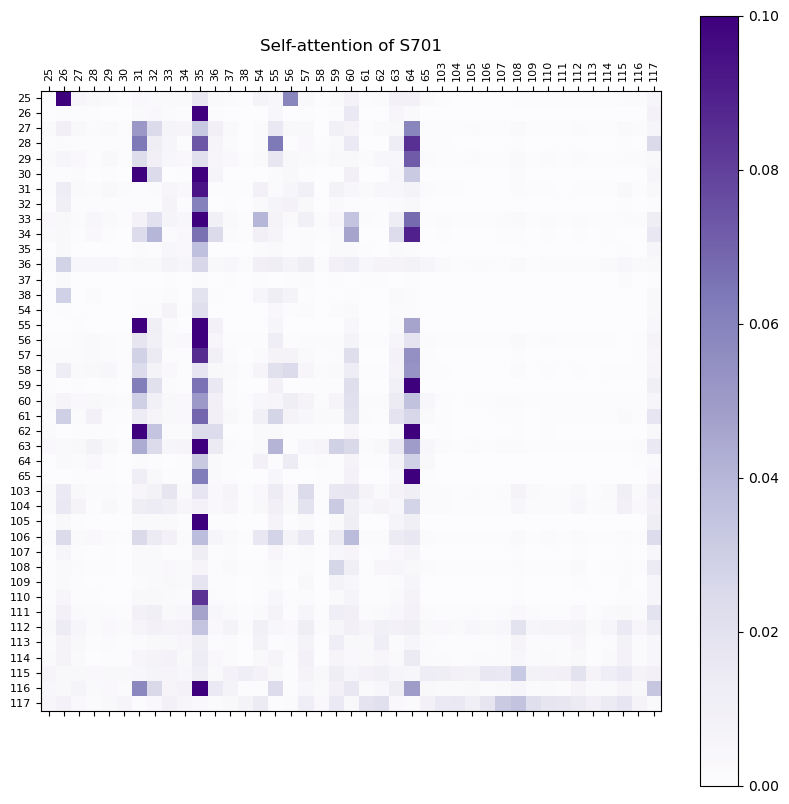

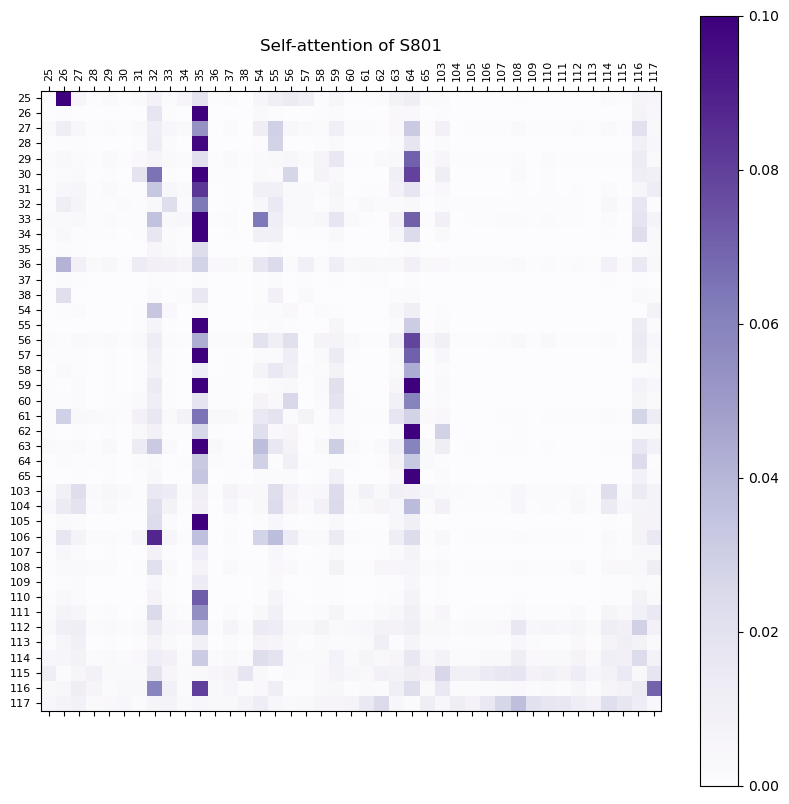

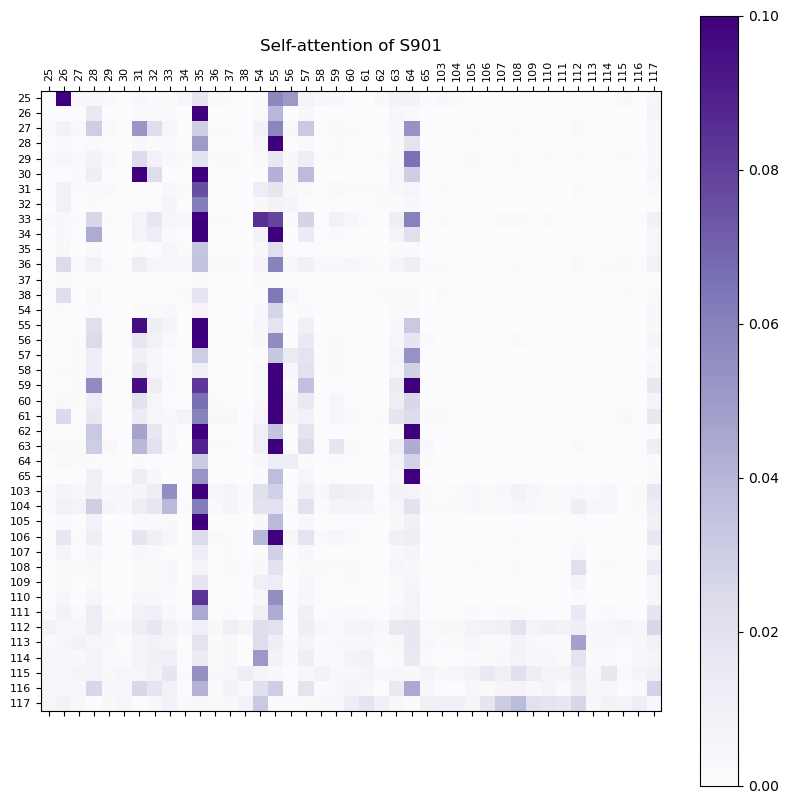

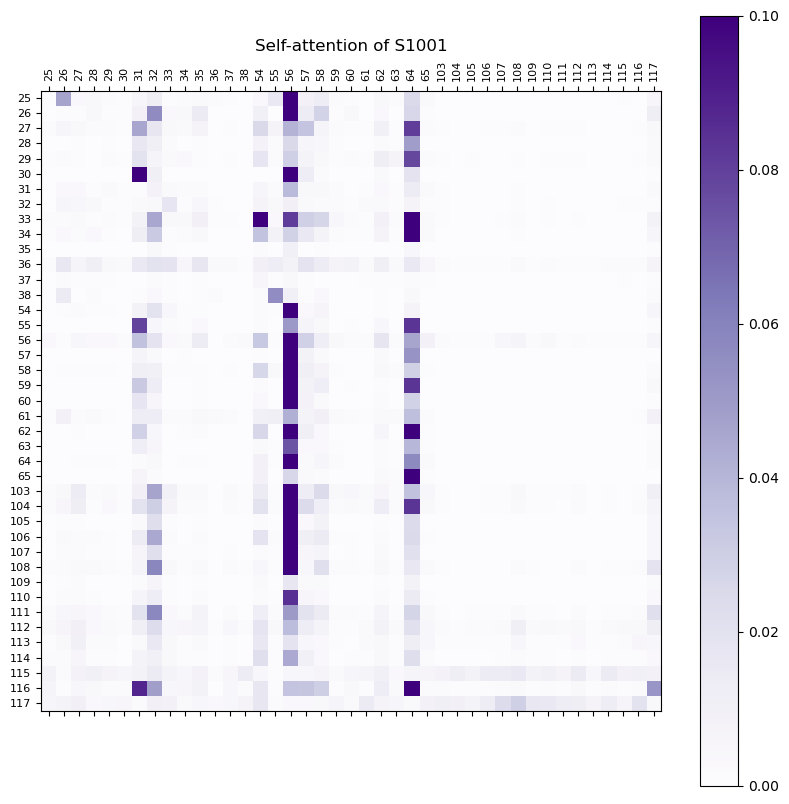

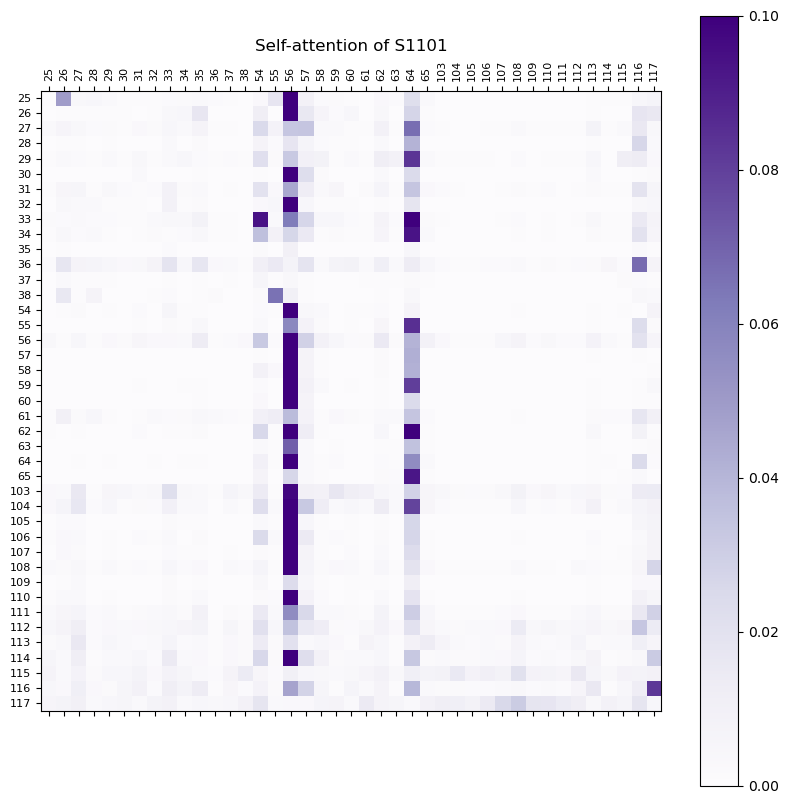

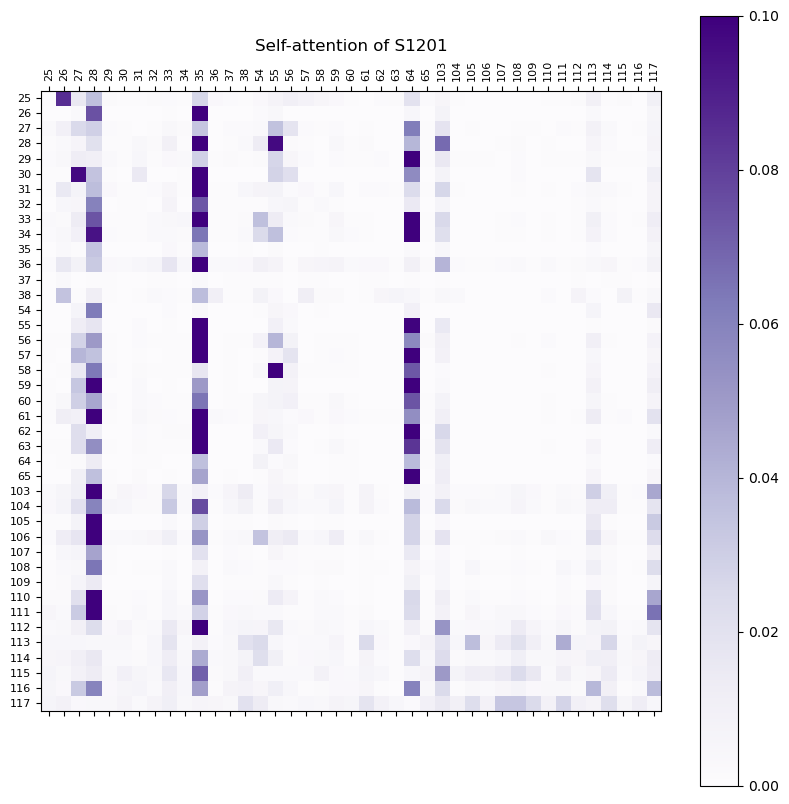

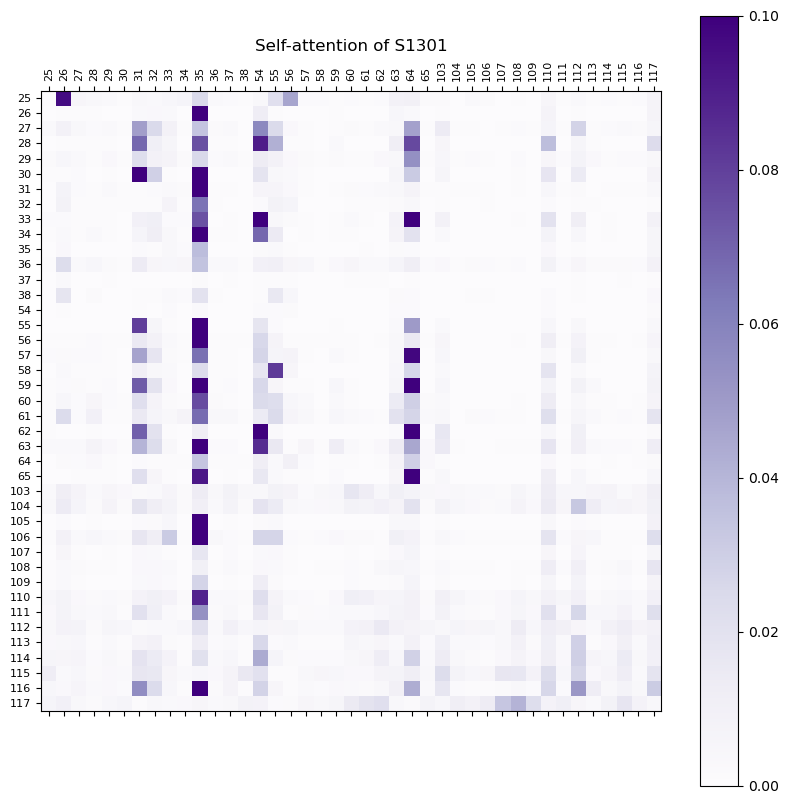

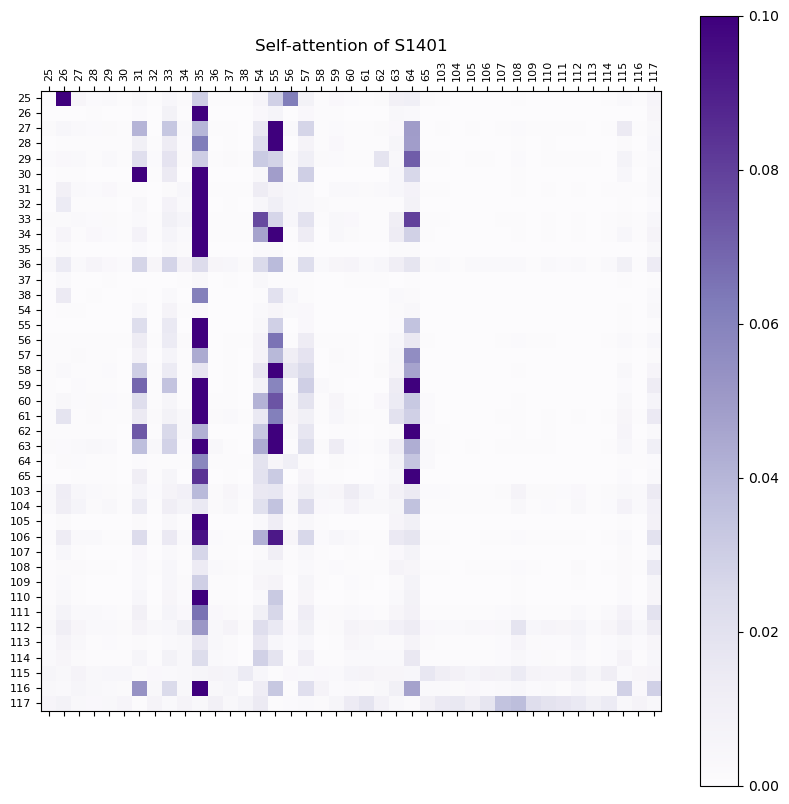

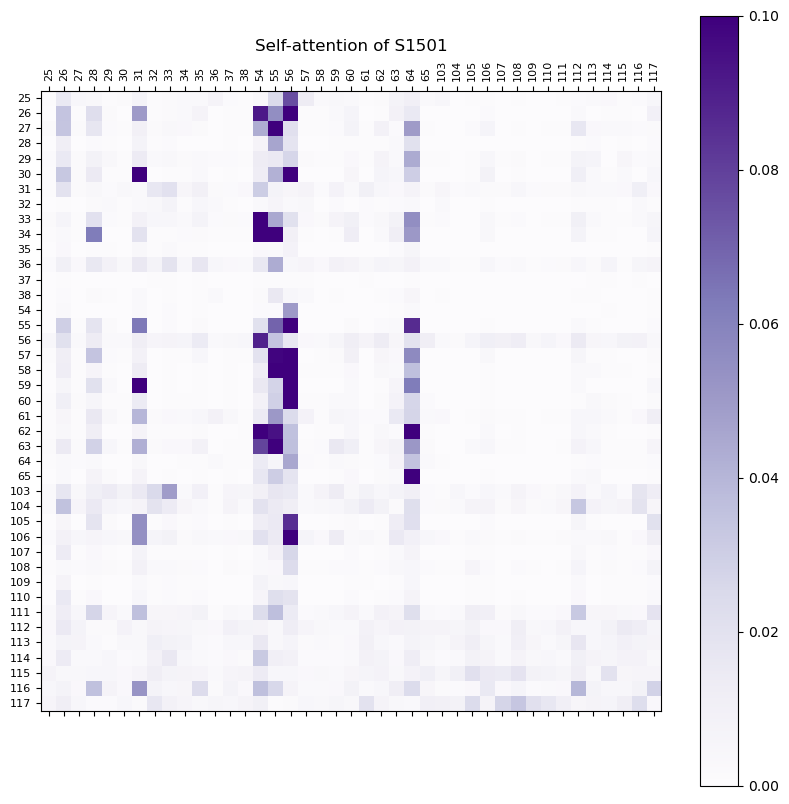

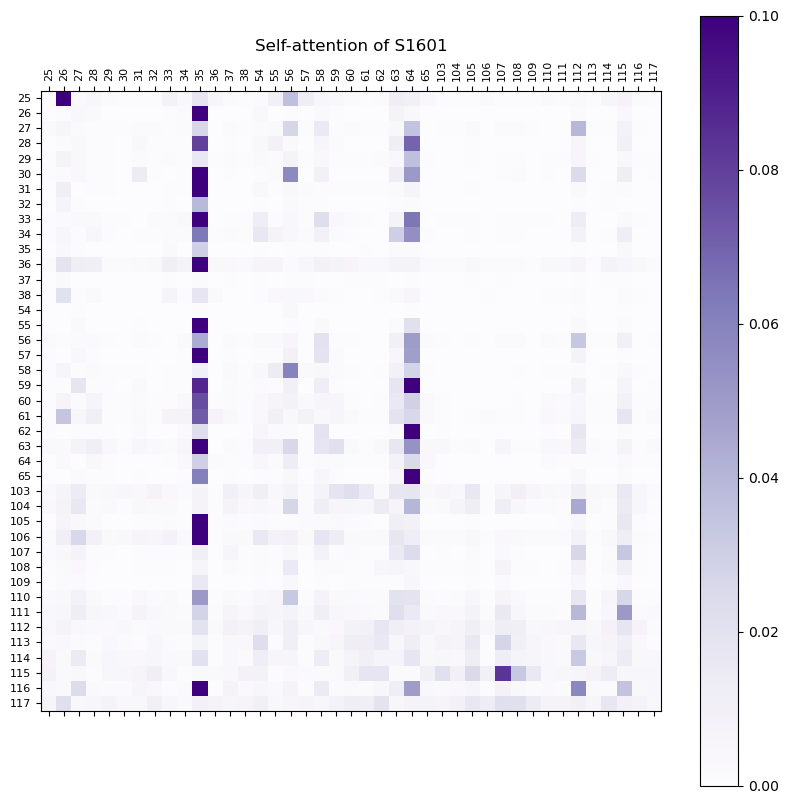

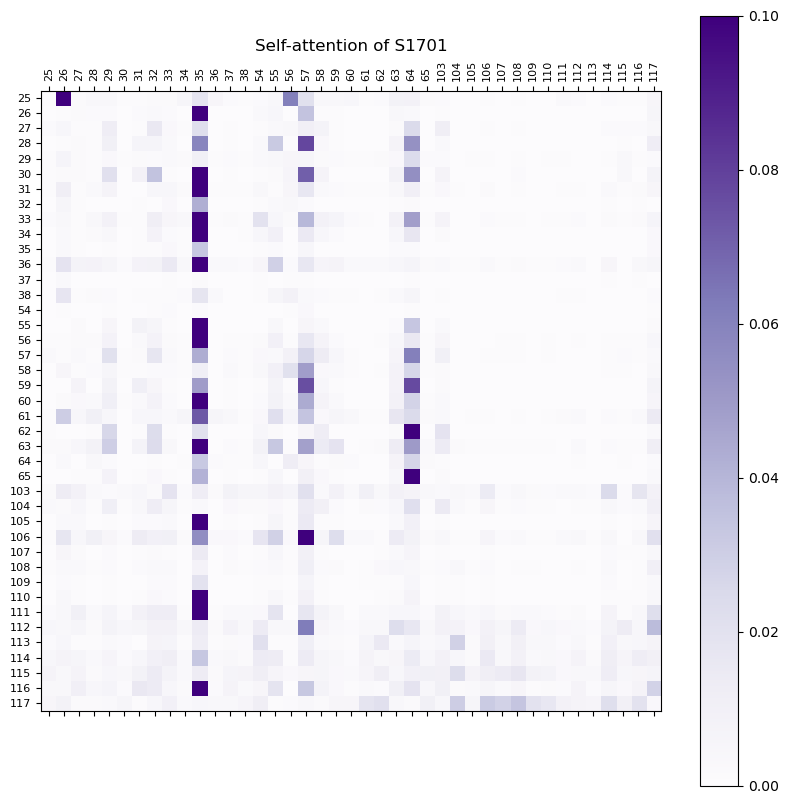

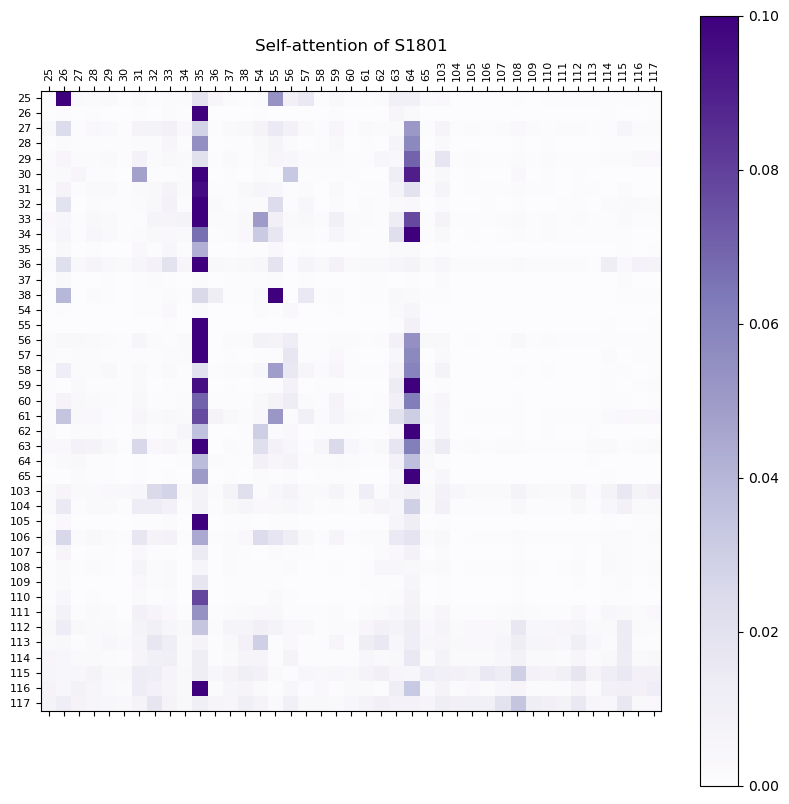

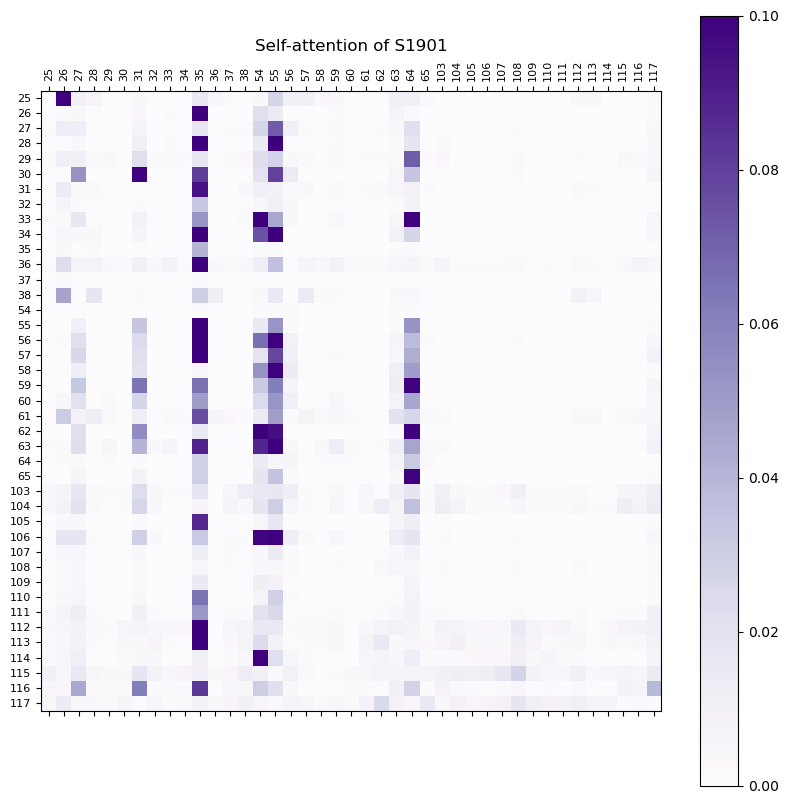

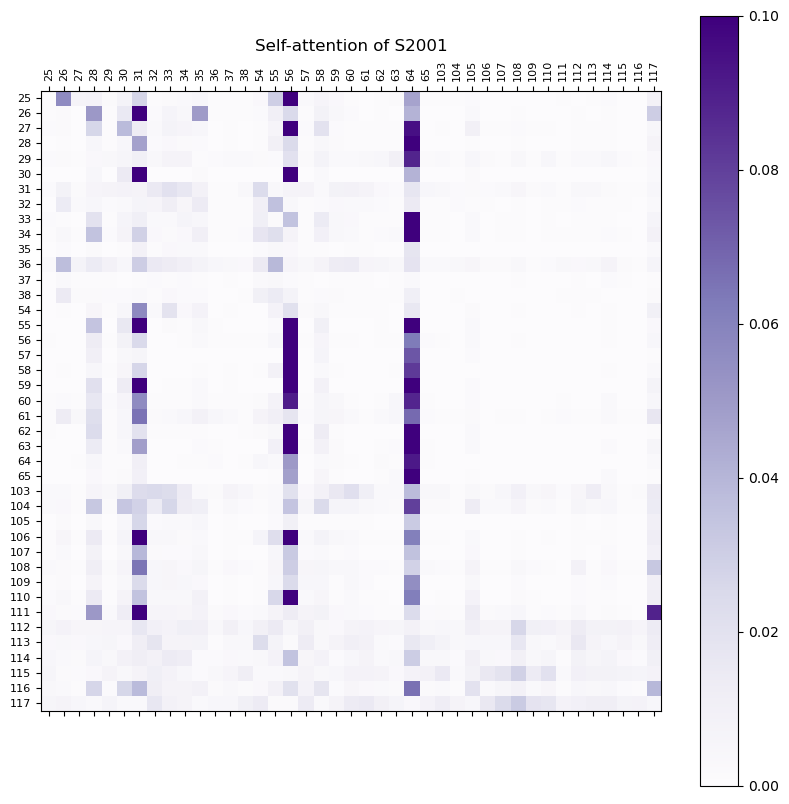

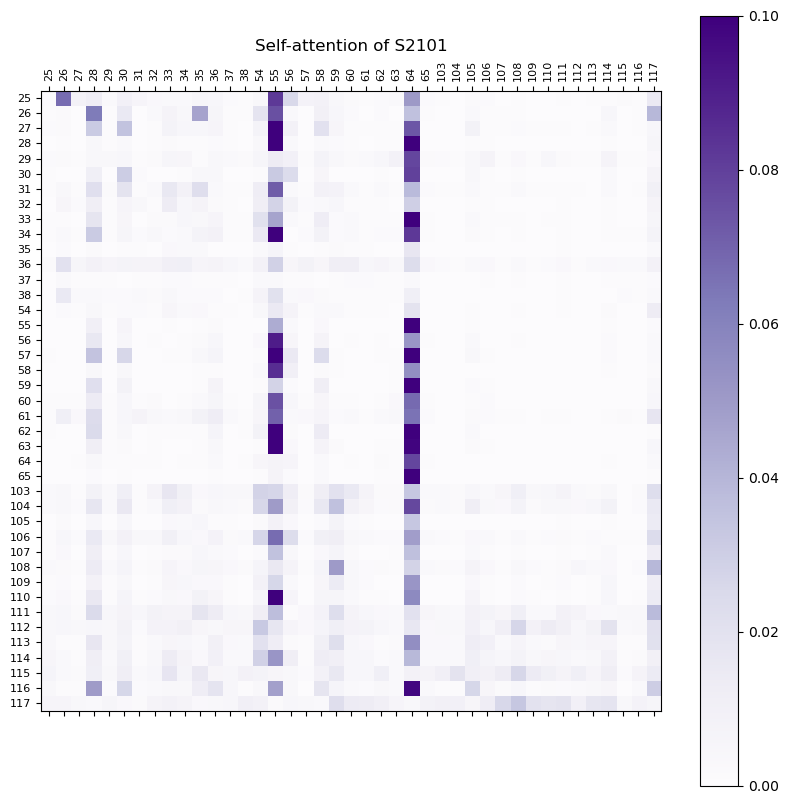

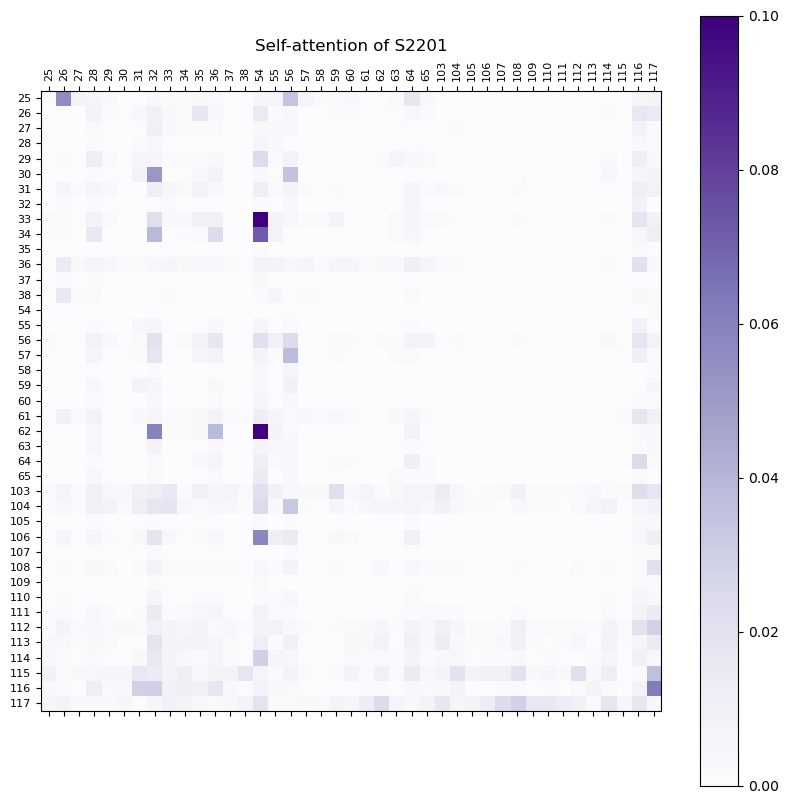

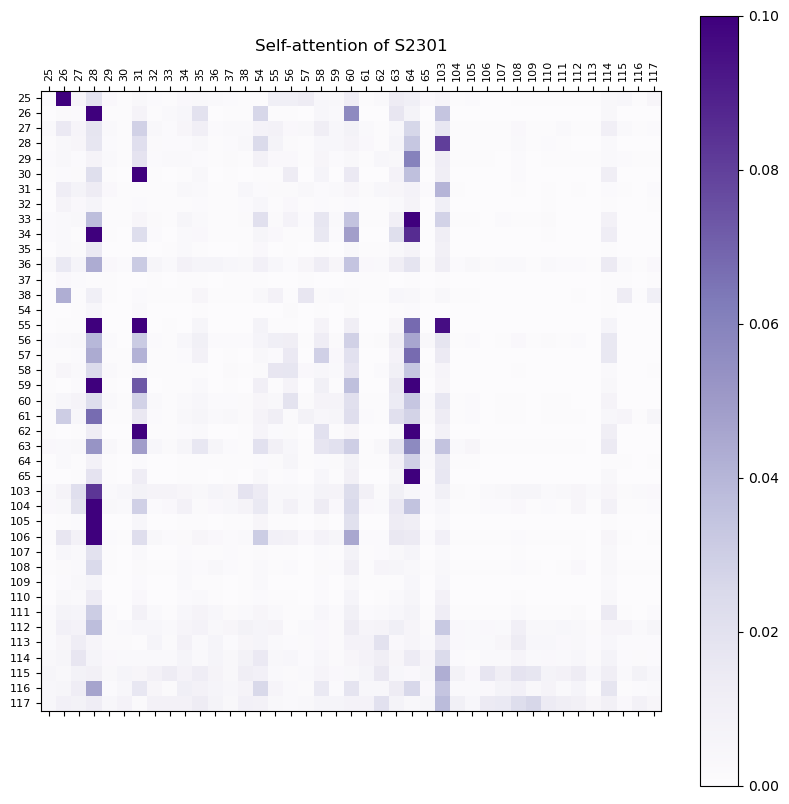

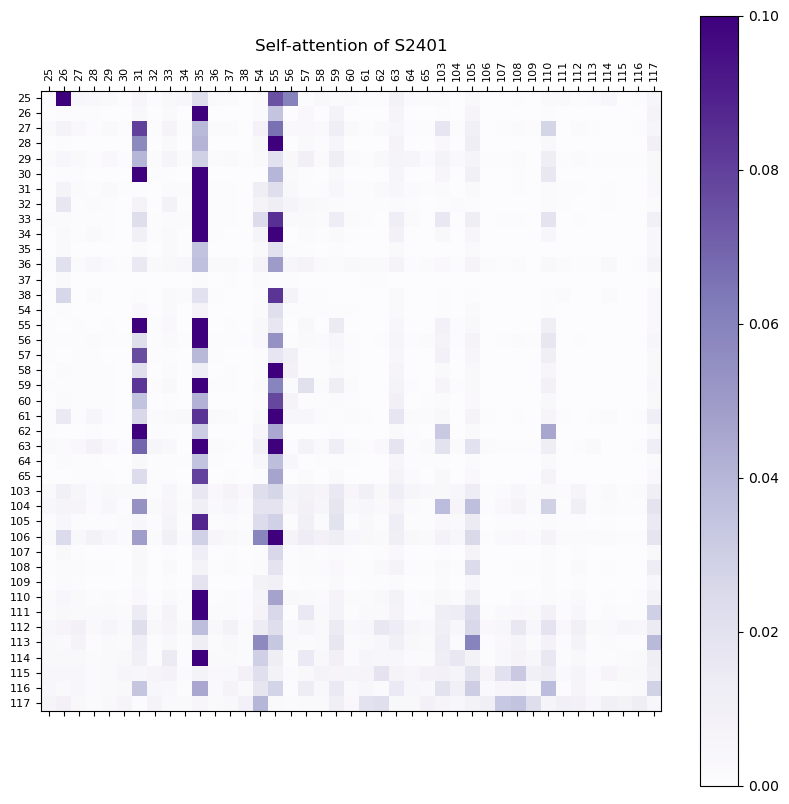

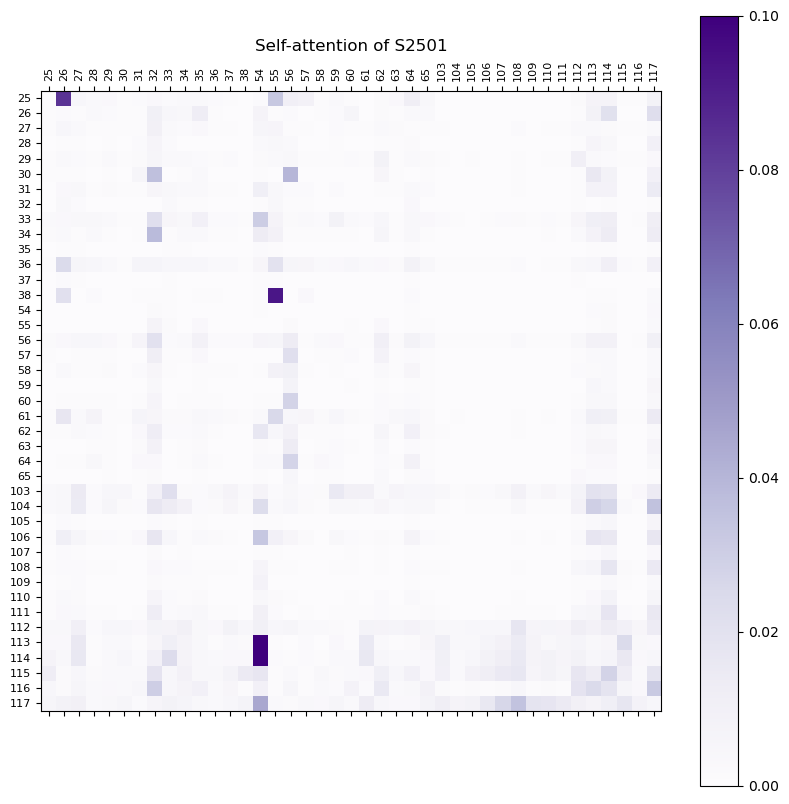

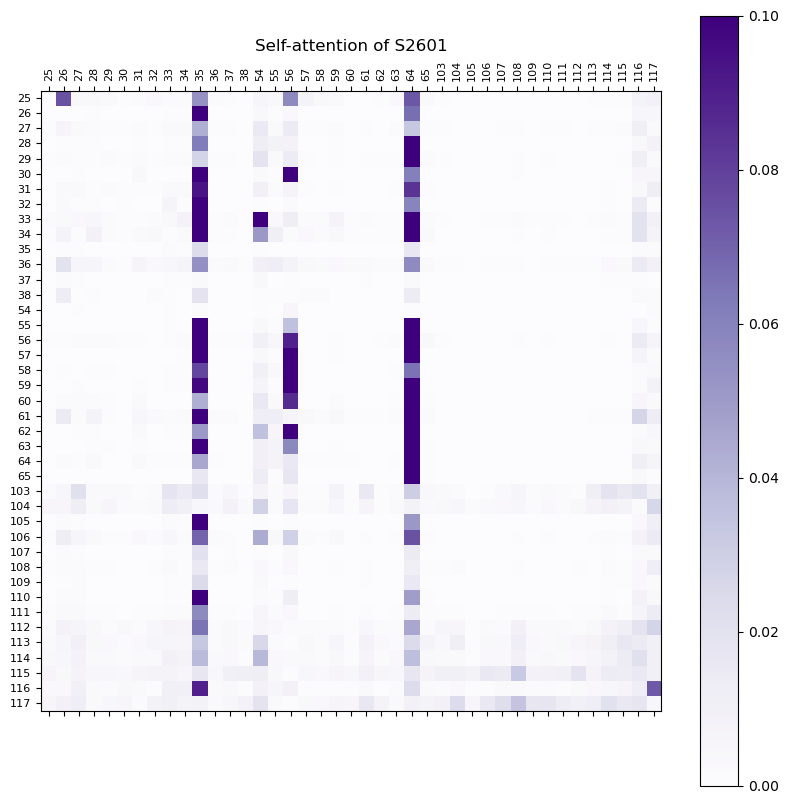

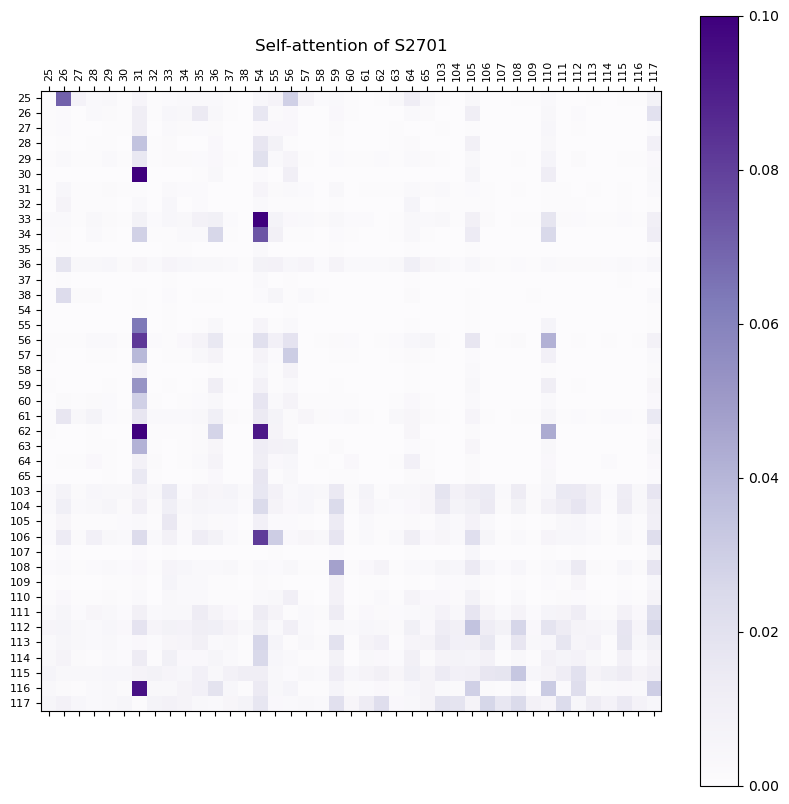

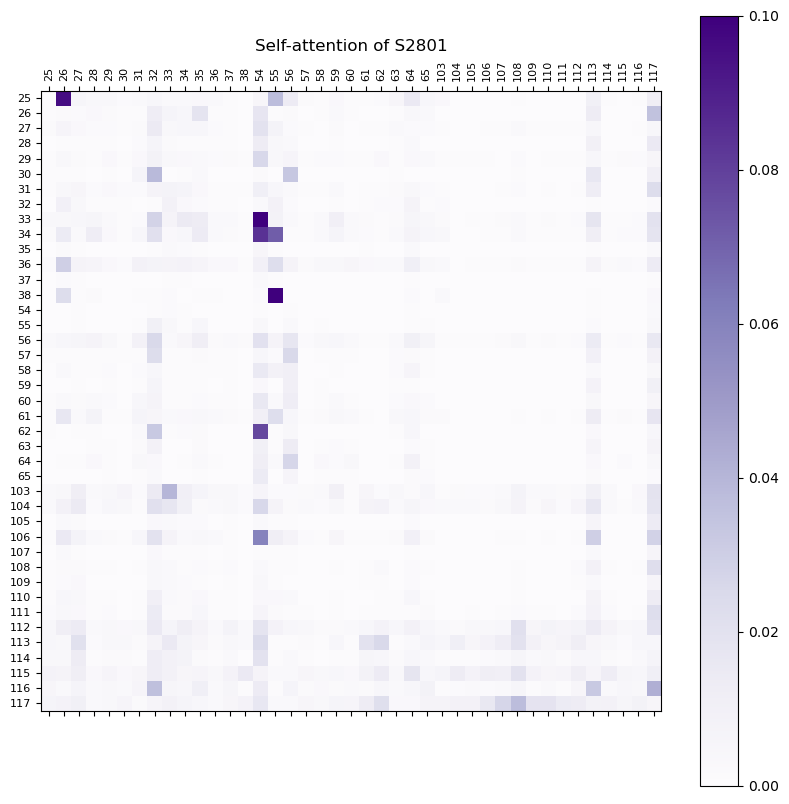

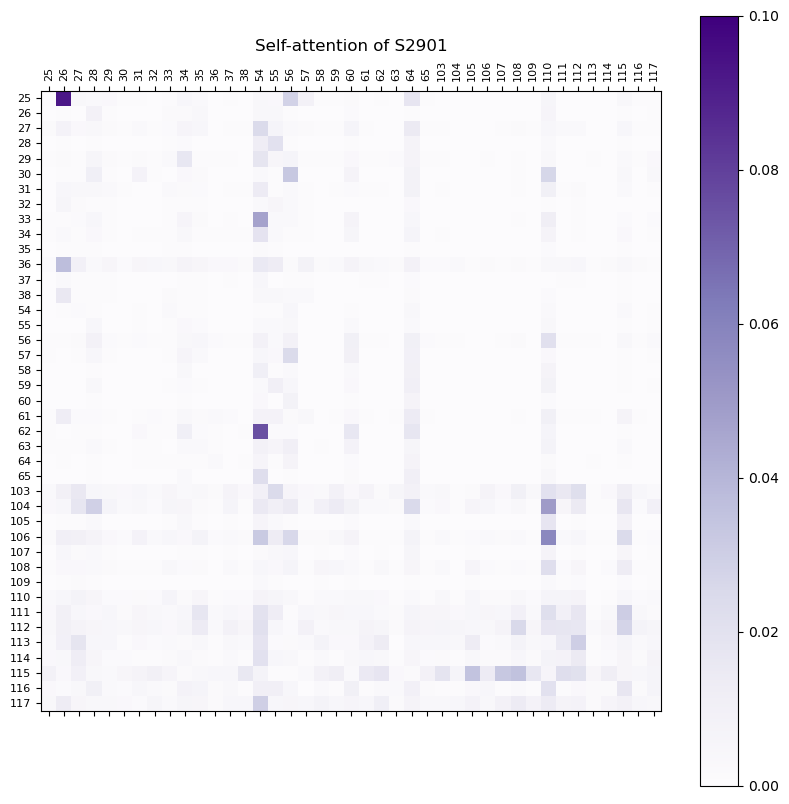

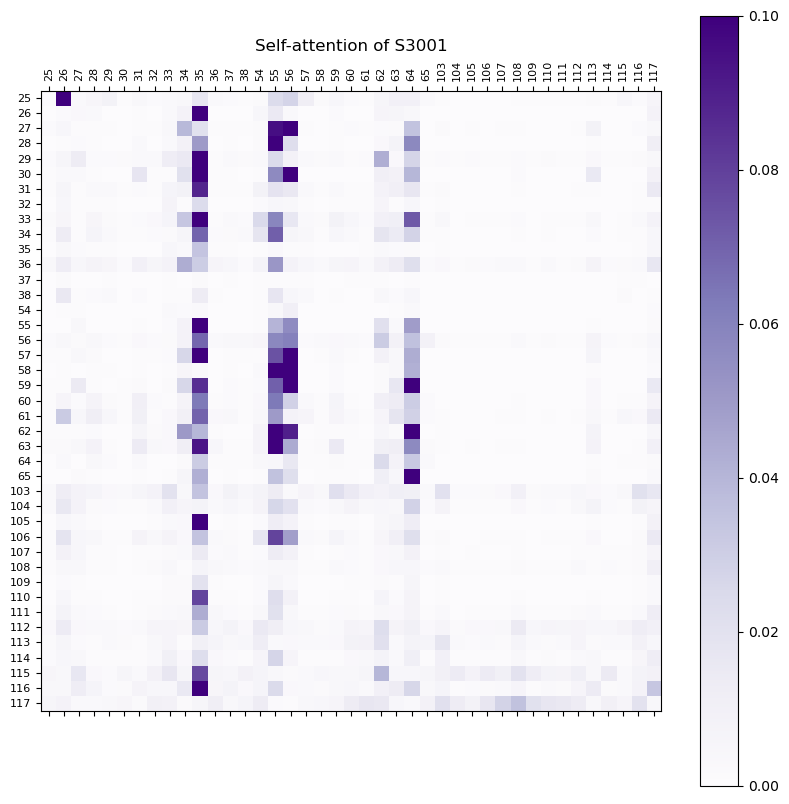

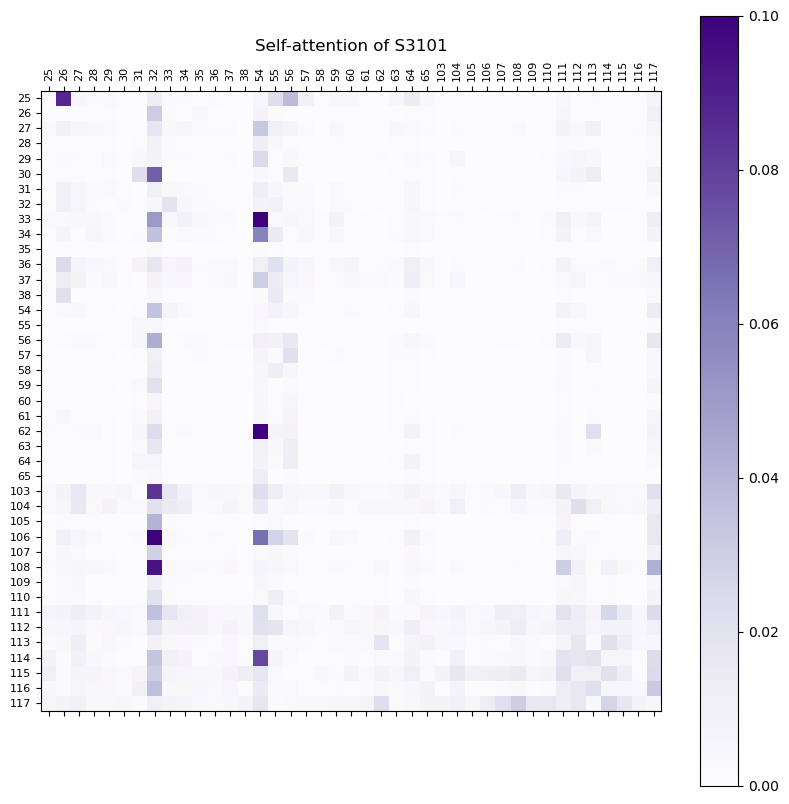

In [15]:
# visualise weights for some sequences
for i in range(len(seqs)):
    if i%100 == 0:
        visualise_self_att(seqs_al[i], "S"+str(i+1))

C:\Users\XTM23\AppData\Local\Temp\ipykernel_16428\3852549790.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(filter_ind)
C:\Users\XTM23\AppData\Local\Temp\ipykernel_16428\3852549790.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(filter_ind)


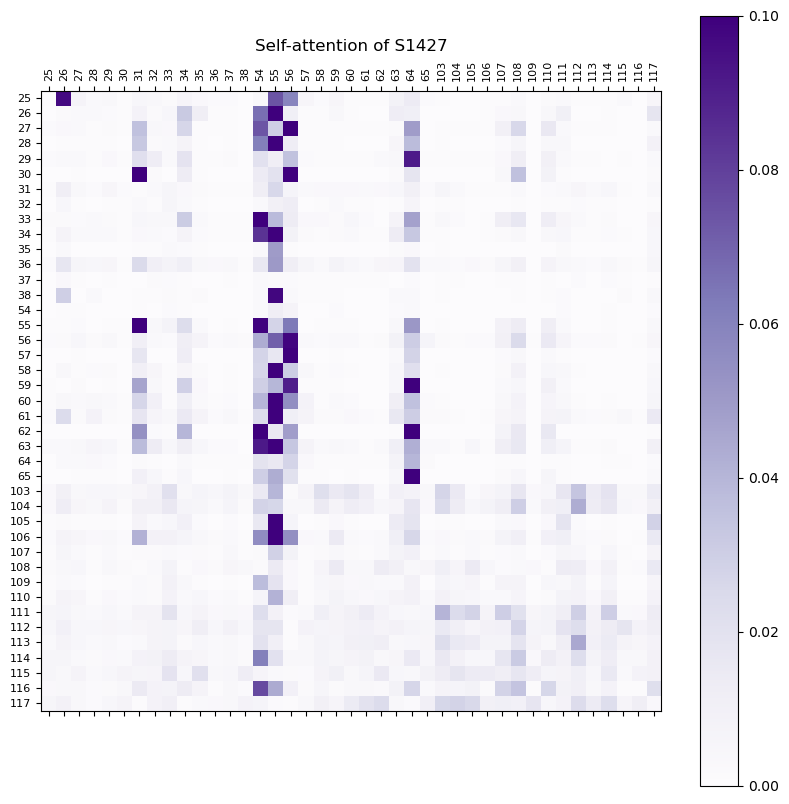

In [ ]:
visualise_self_att("EEQVLESGGGLVKPGGSLRLSCAASGFTF-SPYSVFWVRQAPGKGLEWVSSINSDSTYKYYADSVKGRFTISRDNAENSIFLQMNSLRAEDTAVYYCARDRSYYAFSSLSDYYYGLDVWGQGTLVTVS", "S1427", head=1) 

In [ ]:
seq_dic= {"6co3H":"QVQLVESGGGVVQPGRSLRLSCAASGFAFSSYGMHWVRQAPGKGLEWVAVIWFDGTKKYYTDSVKGRFTISRDNSKNTLYLQMNTLRAEDTAVYYCARDRGIGARRGPYYMDVWGKGTTVTVSS",
          "4g6jH":"QVQLVESGGGVVQPGRSLRLSCAASGFTFSVYGMNWVRQAPAKGLEWVAIIWYDGDNQYYADSVKGRFTISRDNSKNTLYLQMNGLRAEDTAVYYCARDLRTGPFDYWGQGTLVTVSS",
          "6hxwH":"QIQLVQSGAEVKKPGASVKVSCKASGYTFASYNMYWVRQAPGQRLEWIGYIDPYNGGSSYNQKFKGRVTLTRDKSASTAYMELSSLRSEDTAVYYCARGYNNYKAWFAYWGQGTLVTVSS",
          "6hxwC":"QIQLVQSGAEVKKPGASVKVSCKASGYTFASYNMYWVRQAPGQRLEWIGYIDPYNGGSSYNQKFKGRVTLTRDKSASTAYMELSSLRSEDTAVYYCARGYNNYKAWFAYWGQGTLVTVSS"
         } # NOTE save these sequences as a separate FASTA

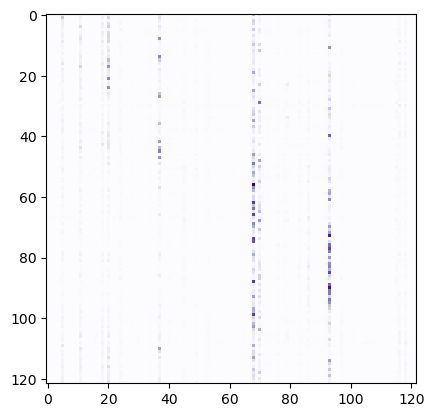

In [ ]:
# TODO save this result to file
token_ids = tokenizer.encode(seq_dic["6hxwH"], return_tensors='pt')
out = model(token_ids)
mat = out.attentions[0][0].detach().numpy()
plt.imshow(mat[-1], cmap='Purples')
plt.show()

In [ ]:
def filter(mat):
    filter_ind = np.concatenate((np.arange(25,39),np.arange(54,66),np.arange(103,118)))
    mat_new = mat[filter_ind,:]
    mat_new = mat_new[:,filter_ind]
    return mat_new

## Try to inspect some sequences from the paper

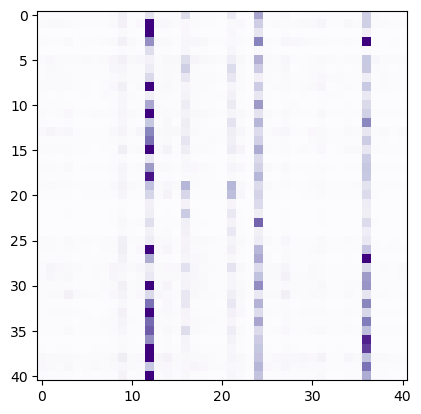

In [ ]:
token_ids = tokenizer.encode(seq_dic["6co3H"], return_tensors='pt')
out = model(token_ids)
mat = out.attentions[0][0].detach().numpy()
plt.imshow(filter((mat[-1])), cmap='Purples',vmin=0,vmax=0.1)
plt.show()

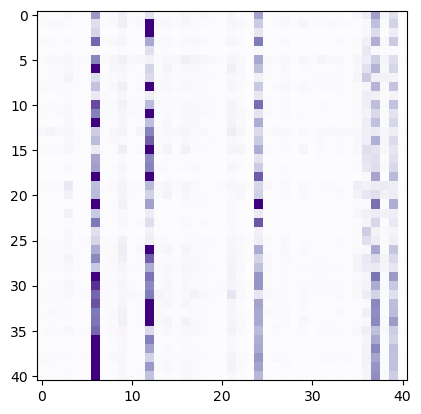

In [ ]:
token_ids = tokenizer.encode(seq_dic["4g6jH"], return_tensors='pt')
out = model(token_ids)
mat = out.attentions[0][0].detach().numpy()
plt.imshow(filter((mat[-1])), cmap='Purples',vmin=0,vmax=0.1)
plt.show()

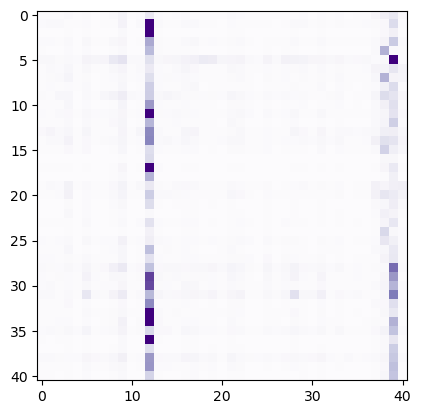

In [ ]:
token_ids = tokenizer.encode(seq_dic["6hxwH"], return_tensors='pt')
out = model(token_ids)
mat = out.attentions[0][0].detach().numpy()
plt.imshow(filter((mat[-1])), cmap='Purples',vmin=0,vmax=0.1)
plt.show()

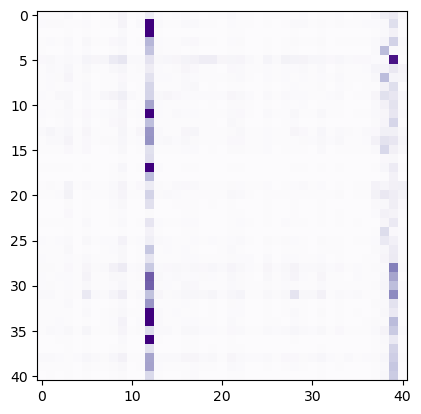

In [ ]:
token_ids = tokenizer.encode(seq_dic["6hxwC"], return_tensors='pt')
out = model(token_ids)
mat = out.attentions[0][0].detach().numpy()
plt.imshow(filter((mat[-1])), cmap='Purples',vmin=0,vmax=0.11)
plt.show()

## TODO attention weights in relation to contact map


In [16]:
def calc_residue_dist(residue_one, residue_two) :
    """Returns the C-alpha distance between two residues"""
    diff_vector  = residue_one["CA"].coord - residue_two["CA"].coord
    return numpy.sqrt(numpy.sum(diff_vector * diff_vector))

def calc_dist_matrix(chain_one, chain_two) :
    """Returns a matrix of C-alpha distances between two chains"""
    answer = numpy.zeros((len(chain_one), len(chain_two)), numpy.float64)
    for row, residue_one in enumerate(chain_one) :
        for col, residue_two in enumerate(chain_two) :
            try:
                answer[row, col] = calc_residue_dist(residue_one, residue_two)
            except KeyError:
                pass
    return answer
structure = Bio.PDB.PDBParser().get_structure(pdb_code[0], pdb_filename[0])
chain1 = structure[0]["A"]
structure = Bio.PDB.PDBParser().get_structure(pdb_code[1], pdb_filename[1])
chain2 = structure[0]["A"]
dist_matrix = calc_dist_matrix(chain1, chain2)

In [17]:
contact_map = dist_matrix < 7 # TODO check threshold
contact_map

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

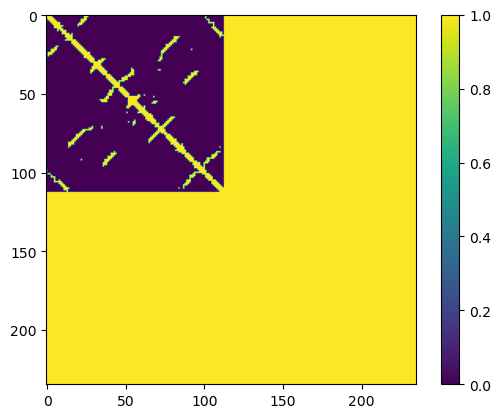

In [18]:
heatmap = plt.imshow(contact_map)
plt.colorbar(heatmap)
plt.show()